In [2]:
close all; clear all; clc;

% 音频均衡器仿真
% 7频段IIR带通滤波器系数的计算
% 语音测试信号生成
% 利用仿真信号对均衡器效果进行测试
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

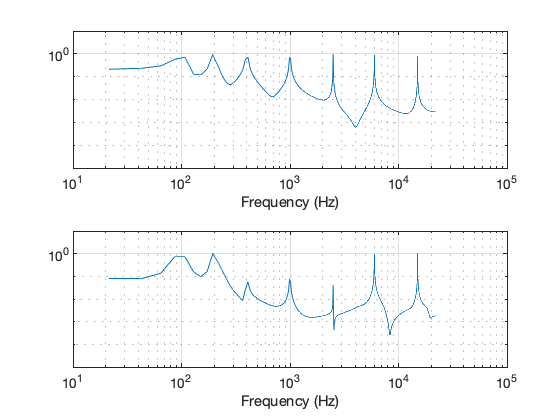

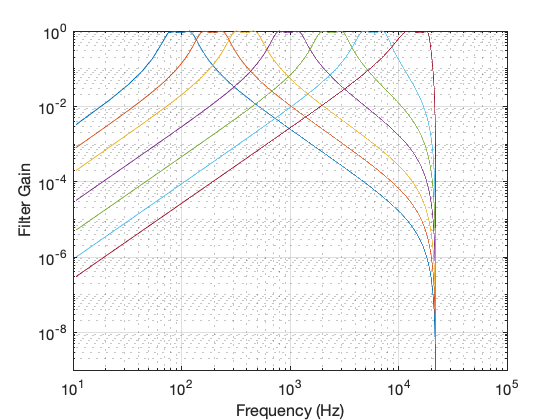

In [1]:
fs = 44100;%采样频率
Ts = 1/fs;%采样间隔

Ap = 1;%通带起伏

%切比雪夫I型原型滤波器，双线性变换法
N = 2;%滤波器阶数
%各个带通滤波器边沿频率
wn0 = 2*[75,125]/fs;
wn1 = 2*[150,250]/fs;
wn2 = 2*[300,500]/fs;
wn3 = 2*[750,1250]/fs;
wn4 = 2*[1875,3125]/fs;
wn5 = 2*[4500,7500]/fs;
wn6 = 2*[11250,18750]/fs;
%各个带通滤波器系数的计算
[b0,a0] = cheby1(N,Ap,wn0);
[b1,a1] = cheby1(N,Ap,wn1);
[b2,a2] = cheby1(N,Ap,wn2);
[b3,a3] = cheby1(N,Ap,wn3);
[b4,a4] = cheby1(N,Ap,wn4);
[b5,a5] = cheby1(N,Ap,wn5);
[b6,a6] = cheby1(N,Ap,wn6);
%各个带通滤波器的频率响应
[H0,f]=freqz(b0,a0,2048,fs);
[H1,f]=freqz(b1,a1,2048,fs);
[H2,f]=freqz(b2,a2,2048,fs);
[H3,f]=freqz(b3,a3,2048,fs);
[H4,f]=freqz(b4,a4,2048,fs);
[H5,f]=freqz(b5,a5,2048,fs);
[H6,f]=freqz(b6,a6,2048,fs);

figure;%绘图，均衡器幅频响应
loglog(f,abs(H0),f,abs(H1), f,abs(H2), ...
f,abs(H3),f,abs(H4),f,abs(H5),f,abs(H6));
xlabel('Frequency (Hz)');ylabel('Filter Gain');
axis([10 10^5  10^(-9)  1]);grid;

%测试信号频率
f0 = 100;f1 = 200;f2 = 400;f3 = 1000;
f4 = 2500;f5 = 6000;f6 = 15000;
%测试信号相位
fai0 = 0;fai1= pi/14;fai2 = 2*fai1;fai3 = 3*fai1;
fai4 = 4*fai1;fai5 = 5*fai1;fai6 = 6*fai1;

t = 0:Ts:2047*Ts;  

%生成测试信号
x = sin(2*pi*f0.*t)+sin(2*pi*f1.*t+fai1)+...
     sin(2*pi*f2.*t+fai2)+sin(2*pi*f3.*t+fai3)+...
     sin(2*pi*f4.*t+fai4)+sin(2*pi*f5.*t+fai5)+...
     sin(2*pi*f6.*t+fai6);       

%各个带通滤波器的输出
y0 = filter(b0,a0,x); 
y1 = filter(b1,a1,x);
y2 = filter(b2,a2,x);
y3 = filter(b3,a3,x);
y4 = filter(b4,a4,x);
y5 = filter(b5,a5,x);
y6 = filter(b6,a6,x);                      

%各频段均衡增益
g0 = 10;g1 = 10;g2 = 0;g3 = 0;
g4 = 0;g5 = 10;g6 = 10;

%均衡器输出
y = g0.*y0+g1.*y1+g2.*y2+g3.*y3+g4.*y4+g5.*y5+g6.*y6+x;  

%计算均衡器输入输出信号的频谱
X = fft(x);Y = fft(y);
magX = abs(X)/max(abs(X));magY = abs(Y)/max(abs(Y));

M = length(x);
f=[0:M/2]*fs/M;

figure;%绘图，均衡器输入输出信号归一化幅度谱
subplot(2,1,1);loglog(f,magX(1:M/2+1));
xlabel('Frequency (Hz)');
axis([10 100000 0.00001 10]);grid;
subplot(2,1,2);loglog(f,magY(1:M/2+1));  
xlabel('Frequency (Hz)');
axis([10 100000 0.00001 10]);grid;